<a href="https://colab.research.google.com/github/SarahPendhari/California-House-Prediction/blob/main/California_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **California House Price Prediction**

---



---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [ ]:
#import the dataset

cf_housing = pd.read_csv("/content/housing.csv")
cf_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
cf_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The total number of values in the dataset are 20640.
In the total_bedrooms feature, there are 20433 non null values only(207 null values).

In [ ]:
cf_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
cf_housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

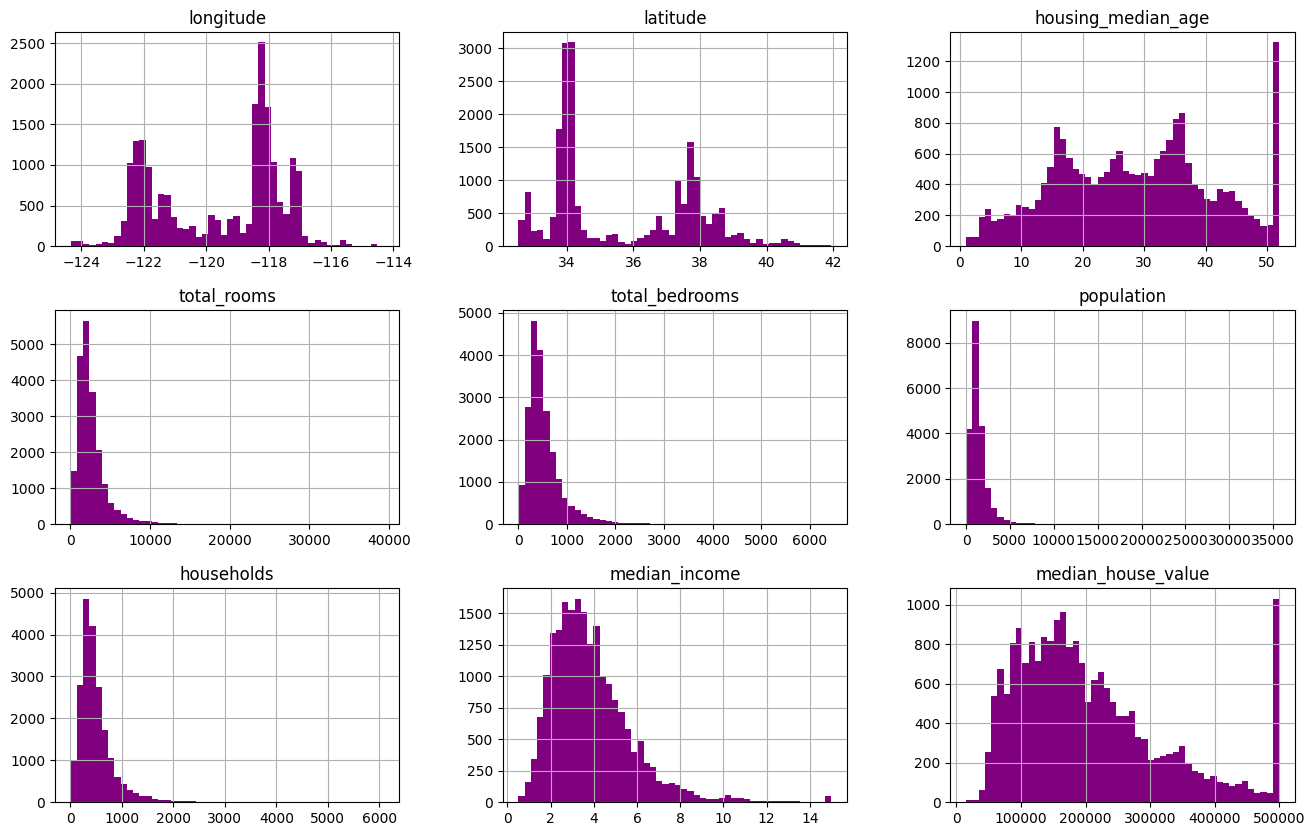

In [ ]:
cf_housing.hist(bins = 50, figsize = (16,10), color = "purple")
plt.show()

Observations:
1. The most of the median_income lies in between $20-$40K.
2. The median_house_valeus ranges mostly between 50,000 - 250,000
3. median_income, total_bedrooms seem to be the most obvious common factors

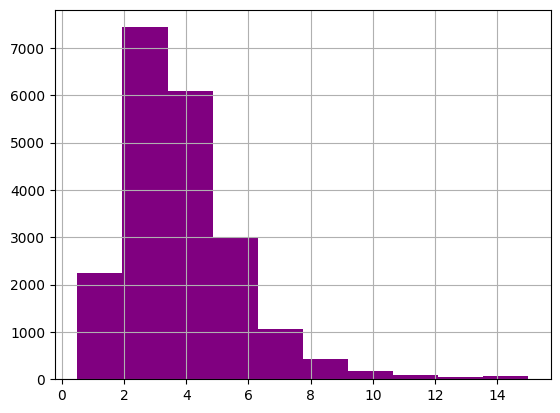

In [ ]:
cf_housing['median_income'].hist(color="purple")
plt.show()

The graph shows skewness after 8.

Let's create categories so that it's easier to use and predict.

Diving the income category to limit the range of the income.

In [ ]:
cf_housing['income_category'] = np.ceil(cf_housing['median_income'] / 1.5)
#putting everything above 5 as the 5th category
cf_housing['income_category'].where(cf_housing['income_category'] < 5, other = 5.0, inplace = True)

In [ ]:
cf_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


We'll be using the **Stratified Shuffled Sampling**.

This dataset includes diverse housing blocks with varying median incomes and housing prices, using stratified shuffle sampling is essential. This approach ensures that the training and testing subsets accurately represent the entire range of socio-economic and geographic diversity present in the dataset, leading to more generalizable and robust models in predicting housing prices.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
#splitting the dataset in test and train

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state=29)

for train_index, test_index in split.split(cf_housing, cf_housing['income_category']):
  strat_train_set = cf_housing.loc[train_index]
  strat_test_set = cf_housing.loc[test_index]

In [ ]:
cf_housing['income_category'].value_counts() / len(cf_housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_category, dtype: float64

In [ ]:
strat_test_set['income_category'].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: income_category, dtype: float64

In [ ]:
# Experimenting with random Subsampling
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(cf_housing, test_size = 0.20, random_state = 29)

In [ ]:
#Compring the results of Random and Stratified Subsampling

def income_category_proportions(data):
  return data['income_category'].value_counts() / len(data)

comparing_proportions = pd.DataFrame({
    "Overall" : income_category_proportions(cf_housing),
    "Random" : income_category_proportions(test_set),
    "Stratified" : income_category_proportions(strat_test_set)
}).sort_index

In [ ]:
comparing_proportions

<bound method DataFrame.sort_index of       Overall    Random  Stratified
3.0  0.350581  0.344719    0.350533
2.0  0.318847  0.311531    0.318798
4.0  0.176308  0.181686    0.176357
5.0  0.114438  0.119428    0.114341
1.0  0.039826  0.042636    0.039971>

In [33]:
for inc in (strat_train_set , strat_test_set):
  inc.drop("income_category", axis = 1, inplace = True)

In [34]:
cf_housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

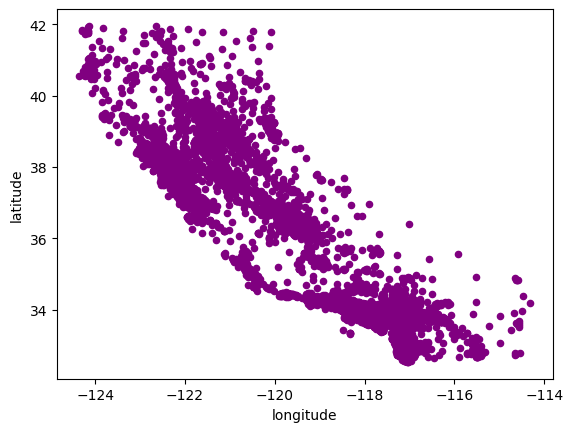

In [38]:
cf_housing.plot(kind = "scatter", x="longitude", y="latitude", color = "purple")

<Axes: xlabel='longitude', ylabel='latitude'>

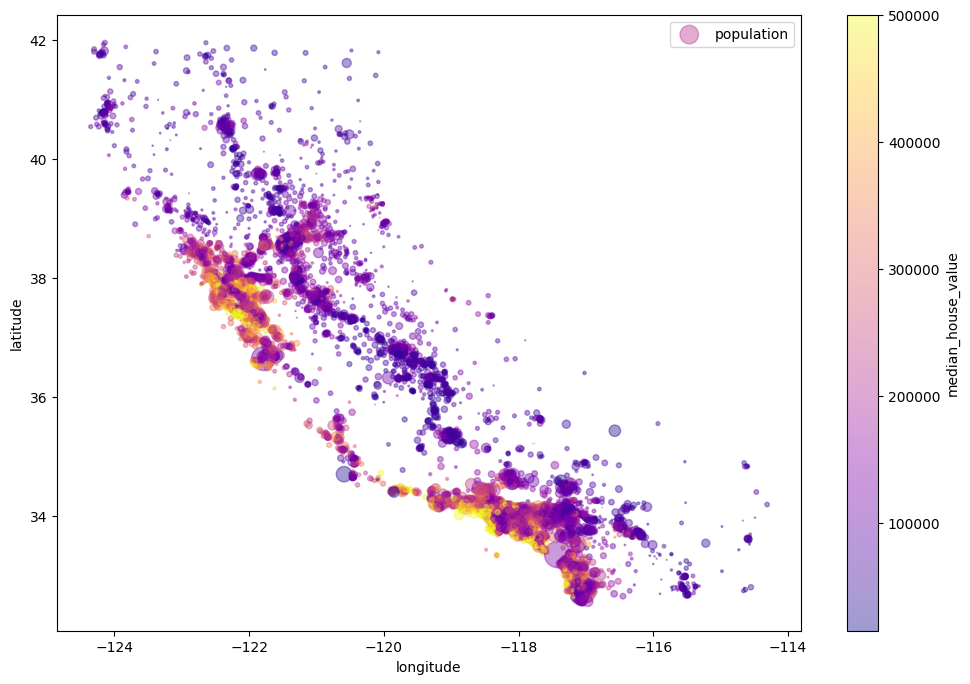

In [42]:
cf_housing.plot(kind = "scatter", x="longitude", y="latitude", alpha = 0.4,
                s = cf_housing['population']/100, label = "population", c = "median_house_value",
                cmap=plt.get_cmap('plasma'), figsize = (12,8))